**01.06.2025**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv('Visadataset.csv')
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [5]:
wage_data=visa_df['prevailing_wage']
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

**percentile concept**

In [6]:
wage_data=visa_df['prevailing_wage']
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [11]:
p_25=np.percentile(wage_data,25)
p_50=np.percentile(wage_data,50)
p_75=np.percentile(wage_data,75)
p_25,p_50,p_75
print(p_25)
print(p_50)
print(p_75)

34015.479999999996
70308.20999999999
107735.51250000001


**Meaning**

In [ ]:
- 25 percentage of application has wage less than 34015.47

    - 25*25480/100=6370 application has wage less than 34015.47

- 50 percentage of application has wage less than 70308.20

    - 50*25480/100=12740 application has wage less than 70308.20

- 75 percentage of application has wage less than 107735.51

    - 75*25480/100=19110 application has wage less than 107735.51



**idea**

In [18]:
p_25=np.percentile(wage_data,25)
con=wage_data<p_25
visa_df[con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
16,EZYV17,Europe,Master's,Y,N,76638,1991,Midwest,3706.7900,Year,Y,Certified
17,EZYV18,Asia,Master's,Y,N,2747,2001,West,16132.6100,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25461,EZYV25462,Asia,Master's,Y,N,2861,2004,West,54.9196,Hour,Y,Denied
25465,EZYV25466,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified
25466,EZYV25467,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified


In [19]:
p_25=np.percentile(wage_data,25)
con=wage_data<p_25
len(visa_df[con])

6370

In [21]:
p_25=np.percentile(wage_data,25)
con=wage_data<p_50
len(visa_df[con])

12740

In [15]:
p_50=np.percentile(wage_data,50)
con=wage_data<p_50
len(visa_df[con])

12740

In [17]:
p_75=np.percentile(wage_data,75)
con=wage_data<p_75
len(wage_data[con])

19110

In [ ]:
**Emperical rule**

u-1*std to u+1*std =68%
or
    (μ ± σ) = 68% of data falls within 1 standard deviation of the mean (μ ± σ)


u-2*std to u+2*std =95%
or
    (μ ± 2σ)= 95% falls within 2 standard deviations (μ ± 2σ)


u-3*std to u+3*std =99.7%
or
    (μ ± 3σ)= 99.7% falls within 3 standard deviations (μ ± 3σ)

In [ ]:
(μ ± σ) = 68% of data falls within 1 standard deviation of the mean (μ ± σ)
(μ -1* σ) to (μ +1* σ)  # for normal distribution (bell shape graph)
u-1*std to u+1*std =68%
step-1 : wage_mean
step-2 : wage_std
step-3 : lb=wage_mean-1*wage_std
step-4 : ub=wage_mean+1*wage_std
step-5 : con1=wage_data>lb
step-6 : con2=wage_data<ub
step-7 : con=con1 & con2
step-8 : len(visa_df[con])==68*25480/100 = 17326,40


In [34]:
wage_mean=wage_data.mean()
wage_std=wage_data.std()
lb=wage_mean-1*wage_std
ub=wage_mean+1*wage_std
con1=wage_data>lb
con2=wage_data<ub
con=con1 & con2
len(visa_df[con])==68*25480/100


False

In [35]:
wage_mean=wage_data.mean()
wage_std=wage_data.std()
lb=wage_mean-2*wage_std
ub=wage_mean+2*wage_std
con1=wage_data>lb
con2=wage_data<ub
con=con1 & con2
len(visa_df[con])==95*25480/100

False

In [37]:
wage_mean=wage_data.mean()
wage_std=wage_data.std()
lb=wage_mean-3*wage_std
ub=wage_mean+3*wage_std
con1=wage_data>lb
con2=wage_data<ub
con=con1 & con2
len(visa_df[con])==99.7*25480/100

False

**conclusion: Data does not following Normal distribution**

**Histogram**

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

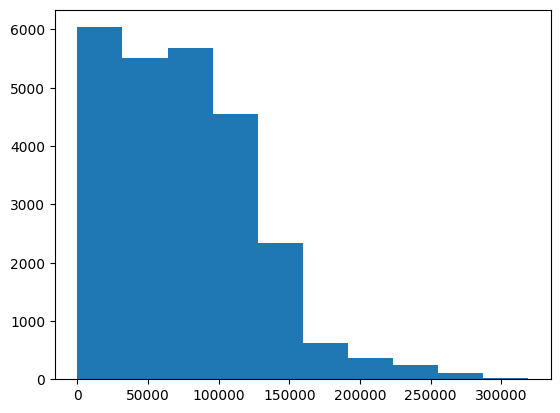

In [39]:
plt.hist(wage_data)

In [41]:
lb=wage_data>=2.13670000e+00
ub=wage_data<3.19229500e+04
con=lb & ub
len(visa_df[con])

6038

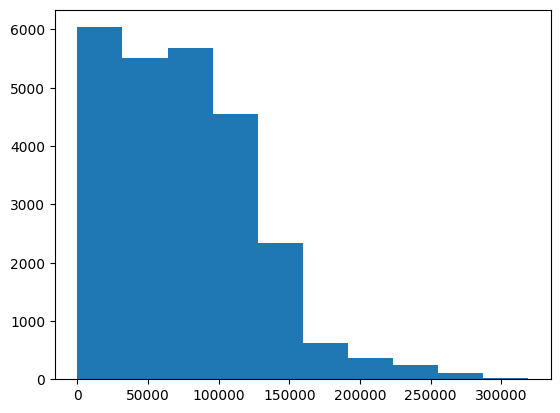

In [42]:
plt.hist(wage_data)
plt.show()

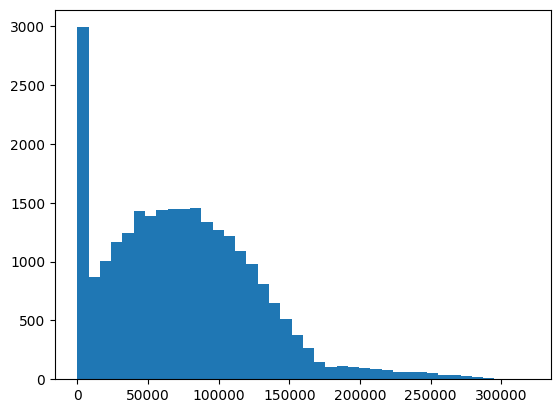

In [43]:
plt.hist(wage_data,bins=40)
plt.show()


**Boxplot**

{'whiskers': [<matplotlib.lines.Line2D at 0x29da867e350>,
 'caps': [<matplotlib.lines.Line2D at 0x29da867e5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29da867e210>],
 'medians': [<matplotlib.lines.Line2D at 0x29da867e850>],
 'fliers': [<matplotlib.lines.Line2D at 0x29da867e990>],
 'means': []}

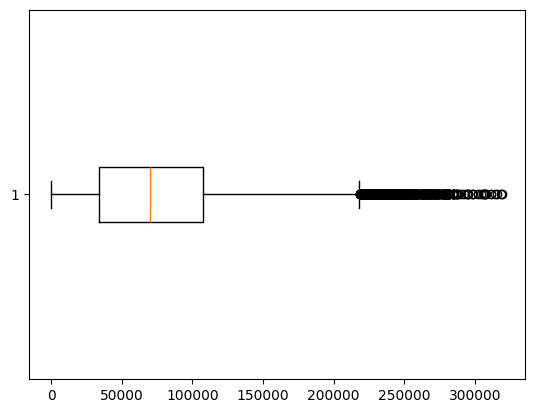

In [45]:
plt.boxplot(wage_data, vert=False)

In [ ]:
# how many outliers are there in this 
# lb=q1-1.5*IQR   lb= lower Bound
# ub=q3+1.5*IQR   ub= upper Bound

In [ ]:
          Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

In [ ]:
step-1: q1,q2,q3
step-2: IQR
step-3: lb=q1-1.5*IQR
step-4: ub=q3+1.5*IQR
step-5: con1=wage_data<lb
step-6: con2=wage_data>ub
step-7: con=con1 | con2

**submit on monday 02.06.2025**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv('Visadataset.csv')

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [50]:
wage_data=visa_df['prevailing_wage']
step-1: q1,q2,q3
step-2: IQR
step-3: lb=q1-1.5*IQR
step-4: ub=q3+1.5*IQR
step-5: con1=wage_data<lb
step-6: con2=wage_data>ub
step-7: con=con1 | con2

In [61]:
q1=visa_df['prevailing_wage'].quantile(0.25)
q2=visa_df['prevailing_wage'].quantile(0.50)
q3=visa_df['prevailing_wage'].quantile(0.75)
print("Q1:", q1, "Q2: ", q2, "Q3:", q3)
IQR=q3-q1
print("IQR", IQR)
lb=q1-1.5*IQR
print("lower bound:", lb)
ub=q3+1*IQR
print("upper bound:", ub)

con1=wage_data<lb

con2=wage_data>lb

outlier_condition = (wage_data < lb) | (wage_data > ub)

#step-7: combine both conditions to detect outlier
con=(wage_data<lb) | (wage_data>ub)
outliers=wage_data[con]
# Filter full DataFrame — not just the Series
outliers_df = visa_df[outlier_condition]
print("Number of outliers:",len(outliers))

print(outliers_df.head())  # show first 5 rows as preview

# Filter full DataFrame — not just the Series
non_outliers_df = visa_df[non_outlier_condition]
print("✅ Non-outliers saved to 'non_outliers_prevailing_wage.csv'")

Q1: 34015.479999999996 Q2:  70308.20999999999 Q3: 107735.51250000001
IQR 73720.03250000002
lower bound: -76564.56875000002
upper bound: 181455.54500000004
Number of outliers: 881
     case_id      continent education_of_employee has_job_experience  \
14    EZYV15           Asia              Master's                  Y   
29    EZYV30           Asia            Bachelor's                  Y   
34    EZYV35           Asia              Master's                  N   
79    EZYV80           Asia           High School                  N   
123  EZYV124  North America              Master's                  N   

    requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
14                      Y            15756         2006                South   
29                      N              758         2009            Northeast   
34                      N             1809         2010                South   
79                      Y             1062         1998             

NameError: name 'non_outlier_condition' is not defined